<center> <img src="https://www.edx.org/static/73f6dc24647b734e2041387d01497335/learn_technical_analysis.jpg"></center>


## Presentation of an open-source Python library for the Technical Analysis of Market Stocks

> This is an introduction to some of the basic TA-Lib functions, based on basic technical analysis terms in trading.

Based on:
- [1] [Himanshu Sharma - Technical Analysis of Stocks using TA-Lib](https://towardsdatascience.com/technical-analysis-of-stocks-using-ta-lib-305614165051)
- [2] [Adnan's Random bytes - Introduction to technical Analysis in Python using TA-Lib](https://blog.adnansiddiqi.me/introduction-to-technical-analysis-in-python-using-ta-lib/)
- [3] [Darío López Padial - Technical Analysis Library in Python](https://github.com/bukosabino/ta)
- [4] [TA-Lib](http://ta-lib.github.io/ta-lib-python/)
- [5] [fidelity.com - Simple Moving Average](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/sma)
- [6] [TA-Lib v0.3.6 API Reference](https://hexdocs.pm/talib/api-reference.html)
- [7] [fidelity.com - Exponential Moving Average](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/ema)
- [8] [fidelitiy.com - ADX: How strong is this market?](https://www.fidelity.com/viewpoints/active-investor/average-directional-index-ADX)
- [9] [fidelity.com - Directional Movement Index (DMI)](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/DMI)
- [10] [fidelity.com - Bollinger Band® Width](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-band-width)

> "*Technical Performance Indicators are the mathematical calculations that are performed on different stock parameters like Volume, Price, etc. [...] These performance indicators are generally visualized using charts and graphs. [...] TA-Lib is an open-source python library that is used in analyzing the stock market’s historical data like share price, volume, etc. in order to predict the future price or the market direction so that we can make our investments accordingly.*" [[1]](https://towardsdatascience.com/technical-analysis-of-stocks-using-ta-lib-305614165051)

In Ta-lib:
- [Includes 200 indicators](https://www.ta-lib.org/function.html) such as ADX, MACD, RSI, Stochastic, Bollinger Bands etc
- Candlestick pattern recognition



First things first, install `ta-lib`. The native installation is not that easy, you should [download it, from here](https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib), and install it with`pip install <filename.whl>`. Installation in a Jupyter notebook, or in conda is much easyer:

In [1]:
%%capture
conda install -c conda-forge ta-lib

Now for the usage of stock market data we need some additional libraries, such as [Yahoo!Ⓡ finance](https://finance.yahoo.com/):

In [2]:
%%capture
pip install yfinance

In [5]:
import yfinance as yf
import talib as ta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The stock data what we will use is [BlackBerry Limited (BB)](https://finance.yahoo.com/quote/BB/), from the year 2022. 


To change the observed stock, change `yf.Ticker("stock")` value, based on https://finance.yahoo.com. *example: `BTC`, `BTC-USD`, `^DJI`, etc.*

Change `start` and `end` values in `yyyy-mm-dd` format at `power.history(start="2022-01-01", end='2023-01-01')` to see different time period of the stock.

In [6]:
power = yf.Ticker("BB")
df = power.history(start="2022-01-01", end='2023-01-01')
df.head()

Failed to get ticker 'BB' reason: [Errno Expecting value] <!DOCTYPE html>
<html lang="zh">
<head>
    <meta charset="utf-8">
    <title>Yahoo</title>
    <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <style>
html {
  height: 100%;
}
body {
  background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;
  background-size: cover;
  height: 100%;
  text-align: center;
  font: 300 16px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;
}
#message {
  text-align: left;
  font-weight: 400;
  color: #1A1A1A;
}
#message a {
  padding: 0 3px;
}
#container {
  position: absolute;
  top: 50%;
  left: 50%;
  padding: 0 30px;
  margin-right: -50%;
  transform: translate(-50%, -50%);
  max-width: 40em;
  _width: 40em;
}
#container img {
  width: 174px;
  height: auto;
}
#switcher a {
  font-weight: 400;
}
#switcher a.active {
  color: #000;
  text-decoration:

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


> "*Now we will start creating different technical indicators using Ta-Lib. Although there are a large number of technical indicators, we will only analyze the most important ones or ones that are highly used by professionals.*" [[1]](https://towardsdatascience.com/technical-analysis-of-stocks-using-ta-lib-305614165051)


### Simple Moving Average
> "*Moving averages are one of the core indicators in technical analysis, and there are a variety of different versions. SMA is the easiest moving average to construct. It is simply the average price over the specified period. The average is called "moving" because it is plotted on the chart bar by bar, forming a line that moves along the chart as the average value changes.*"
> 
> - SMAs are often used to determine trend direction. 
>   - If the SMA is moving up, the trend is up. 
>   - If the SMA is moving down, the trend is down. 
>   A 200-bar SMA is common proxy for the long term trend. 50-bar SMAs are typically used to gauge the intermediate trend.
> - SMAs are commonly used to smooth price 
> - Price crossing SMA is often used to trigger trading signals. 
>   - When prices cross above the SMA, you might want to go long or cover short; 
>   - when they cross below the SMA, you might want to go short or exit long.
> - SMA Crossing SMA is another common trading signal. 
>   - When a short period SMA crosses above a long period SMA, you may want to go long. 
>   - You may want to go short when the short-term SMA crosses back below the long-term SMA.
>
> calculation: $$\sum_{i = startofperiod}^{endofperiod}stock price_i$$


[from: [5]](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/sma)

#### Usage of Ta-Lib SMA function:
> `sma(prices, period \\ 50)`
> 
> - **prices:** List of prices, lates price is the first one in the list.
> - **period:** MA period to be calculated. It must be equal or less than size of prices
>
> *example: `TAlib.Indicators.MA.sma([1,2,3,4],3)` will mean* $\frac{4+3+2}{3}=3.0$



*source: [[6]](https://hexdocs.pm/talib/TAlib.Indicators.MA.html#sma/2)*

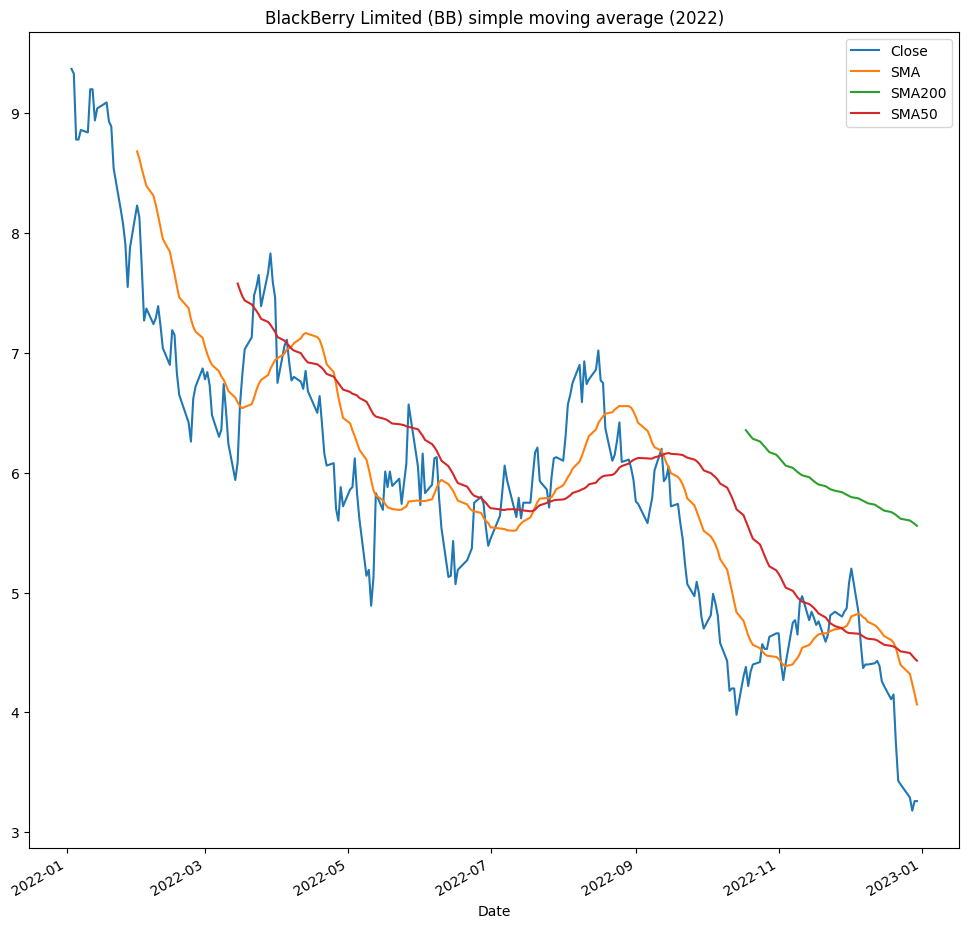

In [ ]:
df['SMA'] = ta.SMA(df['Close'],20)
df['SMA200'] = ta.SMA(df['Close'],200)
df['SMA50'] = ta.SMA(df['Close'],50)
df[['Close','SMA','SMA200', 'SMA50']].plot(figsize=(12,12))
plt.title("BlackBerry Limited (BB) simple moving average (2022)")
plt.show()

### Exponential Moving Average
> "Exponential Moving Average (EMA) is similar to Simple Moving Average (SMA), measuring trend direction over a period of time. However, whereas SMA simply calculates an average of price data, EMA applies more weight to data that is more current. Because of its unique calculation, EMA will follow prices more closely than a corresponding SMA."
> - EMA is generally more sensitive to price movement. This can be a double-edged sword. On one side, it can help you identify trends earlier than an SMA would. On the flip side, the EMA will probably experience more short-term changes than a corresponding SMA
> - determine trend direction, and trade in that direction. When the EMA rises, you may want to consider buying when prices dip near or just below the EMA. When the EMA falls, you may consider selling when prices rally towards or just above the EMA
> -  A rising EMA tends to support the price action, while a falling EMA tends to provide resistance to price action. This reinforces the strategy of buying when the price is near the rising EMA and selling when the price is near the falling EMA.
> - The EMA has a shorter delay than the SMA with the same period.
>
>
> Calculation: $$EMA = (K x (C - P)) + P$$ where: 
> - C = Current Price
> - P = Previous periods EMA (A SMA is used for the first periods calculations)
> - K = Exponential smoothing constant

from: [[7]](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/ema)

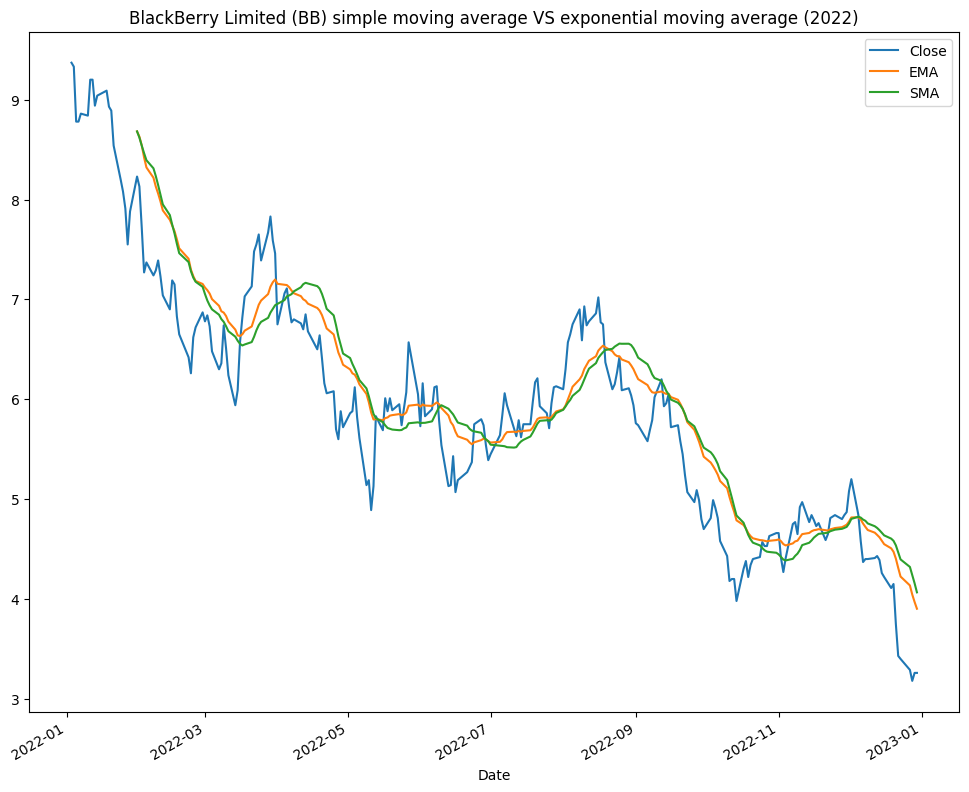

In [ ]:
df['SMA'] = ta.SMA(df['Close'], timeperiod = 20)
df['EMA'] = ta.EMA(df['Close'], timeperiod = 20)
df[['Close','EMA','SMA']].plot(figsize=(12,10))
plt.title("BlackBerry Limited (BB) simple moving average VS exponential moving average (2022)")
plt.show()

### Directional Movement Index (DMI)
> "*The Directional Movement Index (DMI) assists in determining if a security is trending and attempts to measure the strength of the trend. The DMI disregards the direction of the security. It only attempts to determine if there is a trend and that trends strength.*"[[9]](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/DMI)
>
> "*DM lines are calculated using current high and low prices. Much like RSI and stochastics, ADX fluctuates between 0 and 100. The bottom part of the chart below demonstrates what the ADX indicator looks like.*"[[8]](https://www.fidelity.com/viewpoints/active-investor/average-directional-index-ADX)
>
> - Positive Directional Indicator (+DMI) shows the difference between today’s high price and yesterday’s high price. These values are then added up from the past 14 periods and then plotted.
> - Negative Directional Indicator (–DMI) shows the difference between today’s low price and yesterday’s low price. These values are then summed up from the past 14 periods and plotted.
> - Average Directional Movement Index (ADX). ADX is a smoothing of the DX.
> - Average Directional Movement Index Rating (ADXR) is a simple average of today’s ADX value and the ADX from 14 periods ago.
>
>  **Calculation**
>
>   Calculate the True Range, +DI, and –DI for each period:
```
    True Range is the greater of:
    Current High – Current Low
    Absolute value of Current High – Previous Close
    Absolute value of Current Low – Previous Close

    +DI
    IF Current High – Previous High > Previous Low – Current Low
    THEN +DI = the greater of Current High – Previous High OR 0
      
    -DI
    IF Previous Low – Current Low > Current High – Previous High
    THEN –DI = the greater of Previous Low – Current Low OR 0

    IF +DI AND -DI are both negative
    THEN both +DI and –DI = 0

    IF +DI AND -DI are both positive AND +DI > -DI
    THEN +DI = Current High – Previous High AND –DI = 0
    Else IF +DI < -DI
    THEN +DI = 0 AND –DI = Previous Low – Current Low
```
> - Smooth the True Range, +DI, and –DI using Wilder’s smoothing technique.
> - Divide the smoothed +DI by the smoothed True Range and multiply by 100 (this is the +DI that is plotted for the specified period).
> - Divide the smoothed –DI by the smooth True Range and multiply by 100 (this is the –DI that is plotted for the specified period).
> - Next calculate the Directional Movement Index (DX) which equals the (absolute value of the smoothed +DI – the smoothed –DI) /( the sum of the smoothed +DI and smoothed –DI )and multiply by 100.
> - Next calculate the Average Directional Index (ADX). The first value for ADX is an average of the DX over the specified period. The following values are smoothed by multiplying the previous ADX value by the specified period – 1, adding the current DX value, and dividing this total by the period specified.
> - Finally the Directional Movement Rating (ADXR) is calculated by the averaging the current ADX and the ADX value n-periods ago.

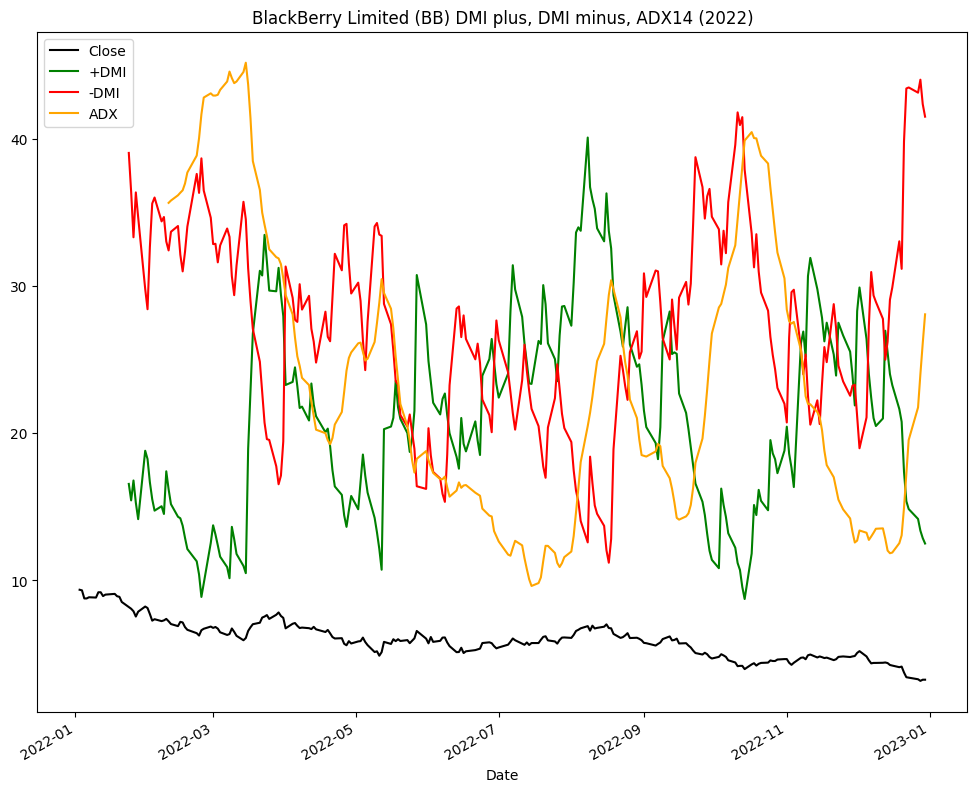

In [ ]:
df['+DMI'] = ta.PLUS_DI(df['High'],df['Low'],df['Close'],timeperiod=14)
df['-DMI'] = ta.MINUS_DI(df['High'],df['Low'],df['Close'],timeperiod=14)
df['ADX'] = ta.ADX(df['High'],df['Low'],df['Close'],timeperiod=14)
df[['Close','+DMI','-DMI','ADX']].plot(figsize=(12,10), color=['black','green','red','orange'])
plt.title("BlackBerry Limited (BB) DMI plus, DMI minus, ADX14 (2022)")
plt.show()

###  Average Directional Movement Index (Momentum Indicator)
> "*If you are an active investor, you may have found yourself asking if the market's rebound from the June lows is for real. One technical indicator that can help shed some light on this question is ADX. According to ADX, the market's momentum may have the strength to continue. [...] To understand why, consider a hypothetical stock that is rising in price. Would you rather own this stock if the uptrend were strengthening or weakening? From a technical analysis perspective, a rising stock in a strong uptrend may suggest greater likelihood of continuing to rise than the same stock whose uptrend is showing signs of weakness.*"
>
> - Average directional index (ADX) is a short-term chart indicator.
> - It can be used to help you evaluate the market or an investment's strength.
> - Currently, ADX suggests the short-term momentum behind stocks may be strong.
> - ADX is used to help determine how strong a trend is
> - Unlike other technical indicators, however, readings above 60 do not occur frequently for ADX. In practice, most chart analysts believe a reading above 25 typically indicates a strong trend and a reading below 20 usually suggests there is no trend—with no clear signal interpretation existing between 20 and 25.
> - if you see a falling ADX line, which indicates an existing trend is weak or there is no trend, you may not want to place as much value in the signals given by trend-following systems.
> - There are many ways that you can incorporate indicators and technical analysis into your investing strategy. One way is to use indicators and other chart techniques to supplement your overall assessment of the fundamentals of the global economy, the business cycle, and other factors relevant to your analysis.
> - Of course, ADX's current reading does not necessarily mean that stocks will continue to rise. More importantly, the lingering threat of inflation, supply chain problems, geopolitical risks, and more could render chart patterns and indicators like ADX irrelevant. With that said, ADX can be used to supplement your view of short-term trends.
>
> **Calculation:**
> >It is simply the mean, or average, of the values of directional movement (DM) lines over a specified period.


source: [[8]](https://www.fidelity.com/viewpoints/active-investor/average-directional-index-ADX)


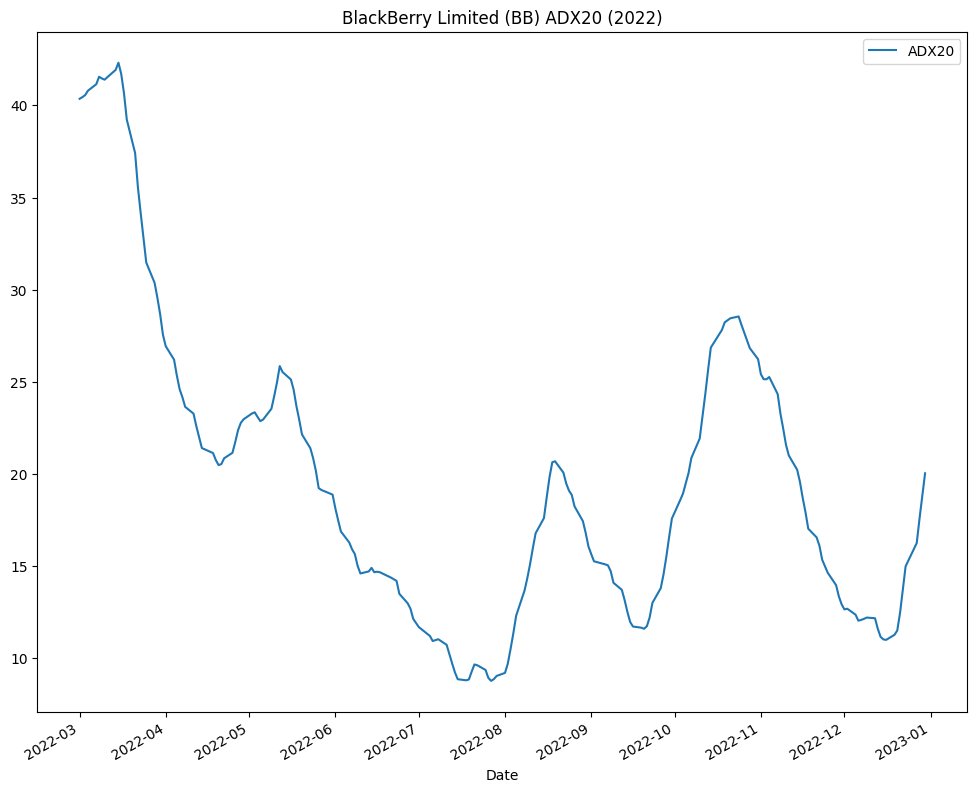

In [ ]:
df['ADX20'] = ta.ADX(df['High'],df['Low'], df['Close'], timeperiod=20)
df[['ADX20']].plot(figsize=(12,10))
plt.title("BlackBerry Limited (BB) ADX20 (2022)")
plt.show()

### Relative Strength Index (RSI)

> "*RSI is a momentum indicator that helps to learn whether a certain share is overbought or oversold. Its value lies between 0-100. If it is under 30, it means it is oversold and has a chance to buy it. If the value lies above 70, it means it is overbought and it is a good chance to dump your stock.*" [[2]](https://blog.adnansiddiqi.me/introduction-to-technical-analysis-in-python-using-ta-lib/)

Date
2022-12-16 00:00:00-05:00    35.598387
2022-12-19 00:00:00-05:00    32.799544
2022-12-20 00:00:00-05:00    34.806803
2022-12-21 00:00:00-05:00    26.335384
2022-12-22 00:00:00-05:00    21.770455
2022-12-23 00:00:00-05:00    21.396015
2022-12-27 00:00:00-05:00    20.035297
2022-12-28 00:00:00-05:00    18.751061
2022-12-29 00:00:00-05:00    22.635027
2022-12-30 00:00:00-05:00    22.635027
Name: RSI, dtype: float64

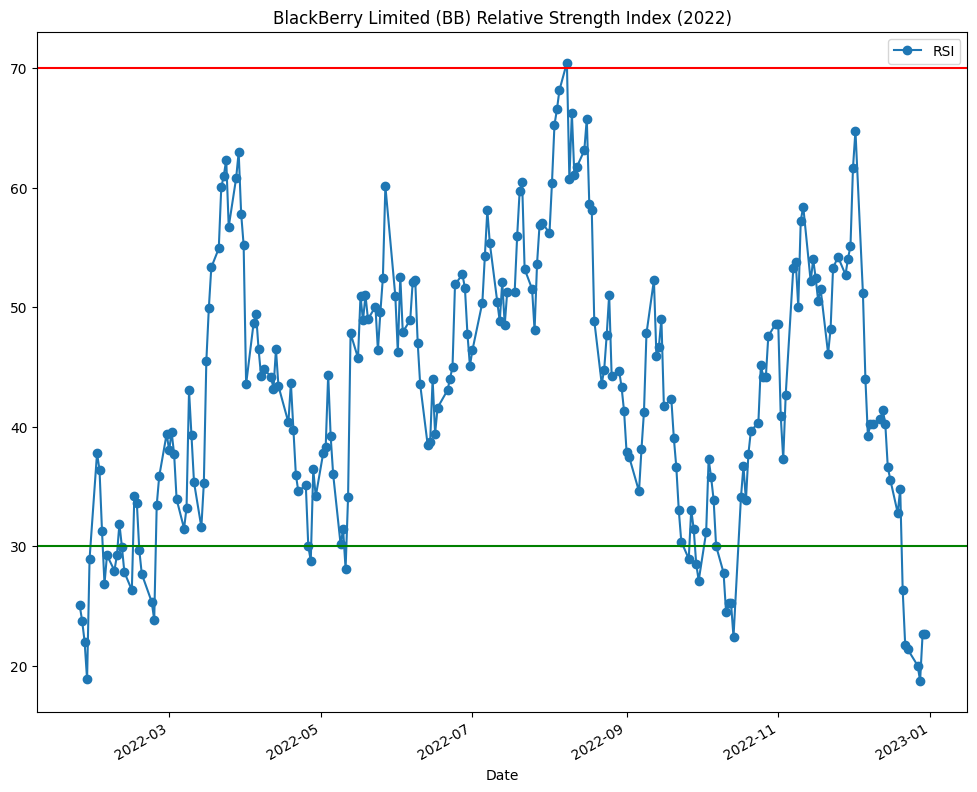

In [ ]:
df['RSI'] = ta.RSI(df['Close'],14)
df[['RSI']].plot(figsize=(12,10),marker='o')
plt.title("BlackBerry Limited (BB) Relative Strength Index (2022)")
plt.axhline(y=30, color='green', linestyle='-')
plt.axhline(y=70, color='red', linestyle='-')
x = np.arange(0, len(df['RSI']),0.1)
df['RSI'].tail(10)

###  Bollinger Band® Width 
> "*This technical indicator provides an easy way to visualize consolidation before price movements (low bandwidth values) or periods of higher volatility (high bandwidth values). The Bollinger Band Width uses the same two parameters as the Bollinger Bands: a simple moving- average period (for the middle band) and the number of standard deviations by which the upper and lower bands should be offset from the middle band.*" [[10]](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-band-width)
>
> - When the bands are relatively far apart, that is often a sign that the current trend may be ending. When the distance between the two bands is relatively narrow that is often a sign that a market or security may be about to initiate a pronounced move in either direction.
> 
> **Calculation:**
> `Band Width = (Upper Bollinger Band - Lower Bollinger Band) / Middle Bollinger Band`

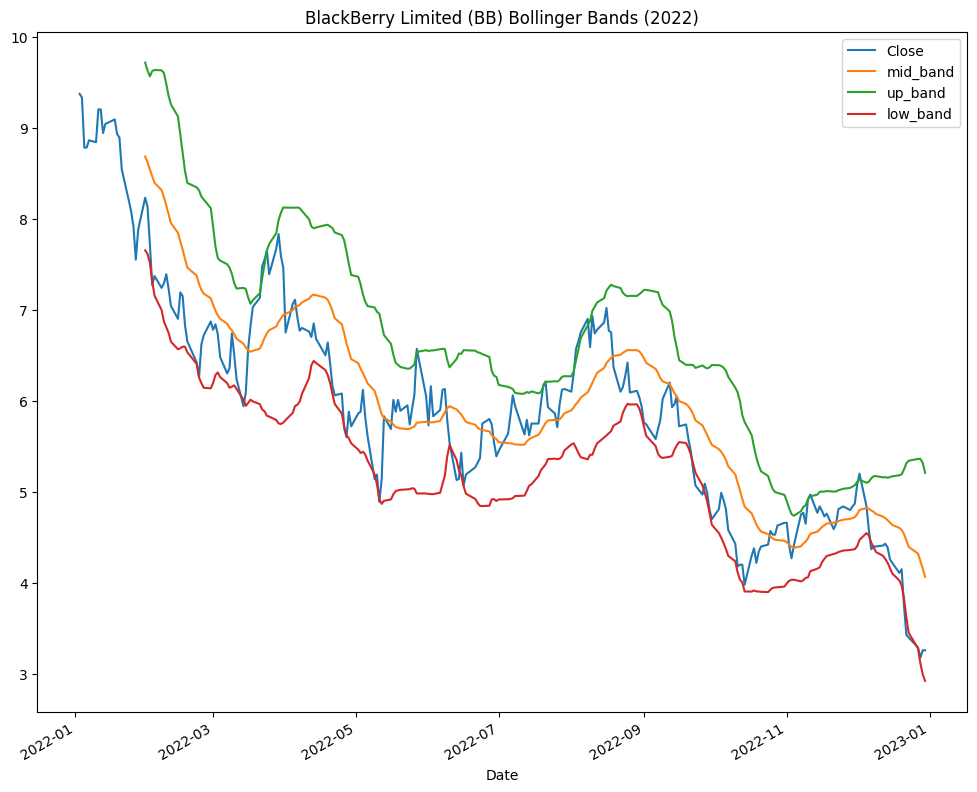

In [ ]:
df['up_band'], df['mid_band'], df['low_band'] = ta.BBANDS(df['Close'], timeperiod =20)
df[['Close','mid_band','up_band','low_band']].plot(figsize= (12,10))
plt.title("BlackBerry Limited (BB) Bollinger Bands (2022)")
plt.show()

*Disclaimer: All investments and trading in the stock market involve risk. Any decisions to place trades in the financial markets, including trading in stock or options or other financial instruments is a personal decision that should only be made after thorough research, including a personal risk and financial assessment and the engagement of professional assistance to the extent you believe necessary. The trading strategies or related information mentioned in this article is for informational purposes only.*